# Martin Iniguez de Onzono Muruaga. Sheet  1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

# Exercise 1. McCulloch-Pitts neuron

### a) Implement a McCulloch-Pitts neuron

In [2]:
def mccull_withbias(x,weights):
    return np.array(np.sign(np.sum(weights*x)))

### b) Show that the neuron performs an AND operation

In [3]:
# Define the inputs
x1=np.array([-1,-1,1,1])
x2=np.array([-1,1,-1,1])
y=[]
weights=np.array([3,2,2])

# Store the output of our neuron
for i in range(0,len(x1)):
    y=np.append(y,mccull_withbias([-1,x1[i],x2[i]],weights))

logic_table=pd.DataFrame(data={'x1':x1,'x2':x2,'y':y})
print(logic_table)

   x1  x2    y
0  -1  -1 -1.0
1  -1   1 -1.0
2   1  -1 -1.0
3   1   1  1.0


In the table, it can be seen that the table for two binary input x1,x2 in {1,+1}, the neuron performs an AND logical operation: it is only positive when both x1 and x2 are positive.

# Exercise 2. Activation functions

The meaning of the parameter _a_ is the activation rate, i.e, it defines how steep is the difference between the values associated to the baseline (-1) and the values associated to the saturation range (+1).

### a) Sigmoid function

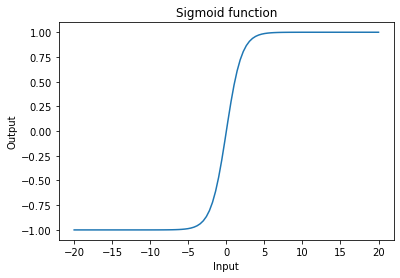

In [4]:
a=1 # Reasonable choice of "a" for all graphs: not too steep but not too shallow activations.

def sigmoid(x,a):
    return 2/(1+np.exp(-a*x))-1

x=np.linspace(-20,20,100)
plt.plot(x,sigmoid(x,a));
plt.title('Sigmoid function');
plt.ylabel('Output')
plt.xlabel('Input');

### b) Hyperbolic tangent function

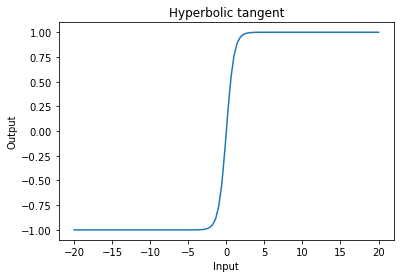

In [5]:
a=1
plt.plot(x,np.tanh(a*x));
plt.title('Hyperbolic tangent');
plt.ylabel('Output')
plt.xlabel('Input');

### c) Piecewise linear function

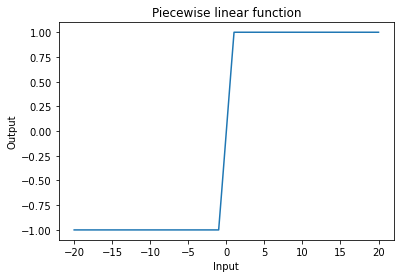

In [6]:
def piec_linear(x,a):
    i=0
    y=[]
    for i in range(0,len(x)):
        if x[i] <= -1/a:
            y= np.append(y,-1)
        if x[i] > -1/a and x[i] < 1/a:
            y= np.append(y,x[i]*a)
        if x[i] > 1/a:
            y= np.append(y,1)
    return y

a=1
plt.plot(x,piec_linear(x,a));
plt.title('Piecewise linear function');
plt.ylabel('Output')
plt.xlabel('Input');

### Choosing an _a_, such that you obtain the step function for all three functions.

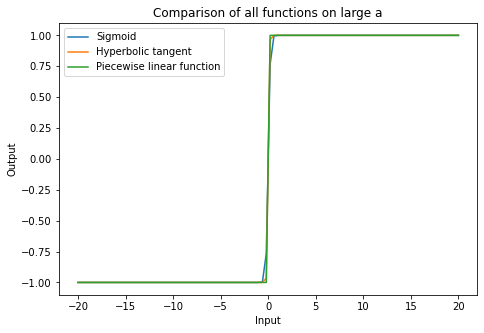

In [7]:
a=10
x=np.linspace(-20,20,100)

plt.figure(figsize=(7.5,5))
ax=plt.subplot(111)

plt.plot(x,sigmoid(x,a),label='Sigmoid')
plt.plot(x,np.tanh(a*x),label='Hyperbolic tangent')
plt.plot(x,piec_linear(x,a),label='Piecewise linear function')
ax.legend();
plt.title('Comparison of all functions on large a');
plt.ylabel('Output')
plt.xlabel('Input');

The higher the _a_, the closer we get to a step function, since the steepness of the non-linear region (from the baseline (-1) to the saturated region (+1)) holds a positive association with _a_. It can be seen here that for _a_ = 10 , the three functions already represent an almost perfect step function.
However, using an _a_ that is too big will provoke an overflow in the system (the exponential terms would grow to big for them to be computed).

# Exercise 3. Rosenblatt's perceptron

### a) Training set and function

In [8]:
x= -(np.ones(1000))
x = np.vstack((x,np.random.normal(0,1,[2,1000])))

def desired(x):
    return np.sign(x[1]+x[2]-0.5)

print(x)

[[-1.         -1.         -1.         ... -1.         -1.
  -1.        ]
 [-0.51604833 -0.57422343  0.39373796 ...  0.56379422  0.50927758
  -1.36793674]
 [-0.21008768  0.96685898 -0.47870531 ... -0.91538037 -0.62256895
  -2.045645  ]]


### b) Training a neuron

In [9]:
# Define the learning function for the weights

def new_weights(weights,learn_step,x):
    return weights+learn_step*(desired(x)-mccull_withbias(x,weights))*x

# Defining some initialization parameters

iter_weights = np.array([0.3,0.3,0.3])
learn_step = 0.1
num_epochs = 1000
weights = np.array([0,0,0]) # Variable to store the previous weights and compare to the new ones
epoch=0

# Instead of checking whether the previous weights were equal to the next ones, I established a tolerance
# value of difference between them, proven to be more effective in computational comparisons.

while np.linalg.norm(weights - iter_weights)> 10**-4 and epoch < num_epochs:
    weights=iter_weights
    for i in range (0,len(x.T)):
        iter_weights=new_weights(iter_weights,learn_step,x[:,i])
    epoch += 1
    print(iter_weights)

# Checking if the algorithm has converged or not (established a big number of iterations so that if we reach that spot, we know somehting is going wrong)
    
if epoch>= num_epochs:
    print('The learning algorithm does not converge.')
else:
    print('The number of iterations needed were ' + str(epoch) + '.')
    weights=iter_weights

[0.5        1.16882688 1.1119501 ]
[0.5        1.29386017 1.46259739]
[0.7        1.46555729 1.63929702]
[0.9        1.70770608 1.61146321]
[0.9        1.86219072 1.69647653]
[0.9        1.82509826 2.04463657]
[0.9        2.02544937 2.0315038 ]
[0.9        1.98825885 2.24173855]
[1.1        2.27753033 2.07369125]
[1.1        2.28094759 2.22281736]
[1.1        2.07509965 2.43715707]
[1.3        2.2868375  2.35349971]
[1.3        2.41359592 2.40229926]
[1.1        2.38647346 2.60508389]
[1.3        2.60404793 2.35158738]
[1.3        2.65627914 2.42219389]
[1.1        2.45670263 2.7637637 ]
[1.3        2.57154732 2.5703919 ]
[1.3        2.57154732 2.5703919 ]
The number of iterations needed were 19.


    Using negative learning steps yields to divergence, so we have to use values of learning steps greater than 0. Also, using small learning rates yield better and faster results. When using large learning steps, the weights grow very big in norm, but hold the same ratio between them (x,2x,2x).

### c) Validation set

In [10]:
# Creating new input dataset

x= -(np.ones(1000))
x = np.vstack((x,np.random.normal(0,1,[2,1000])))

desired_x = desired(x)
correc=0
predic=np.zeros(len(x.T))

# Checking if the desired output is the same as the prediction for all inputs

for i in range(0,len(x.T)):
    predic[i]=mccull_withbias(x[:,i],weights)
    if predic[i]==desired_x[i]:
        correc += 1

correc /= (len(x.T)/100)
print('The percentage of correct predictions with the validation set was ' + str(correc) + '%.')

The percentage of correct predictions with the validation set was 100.0%.


### d) Plotting

For the weight vector to be optimal, the dot product between the desired classification line (x2=0.5-x1) 
and the weight vector should be zero. In this case, it is: 0.00022470395319817982, pretty close to 0.


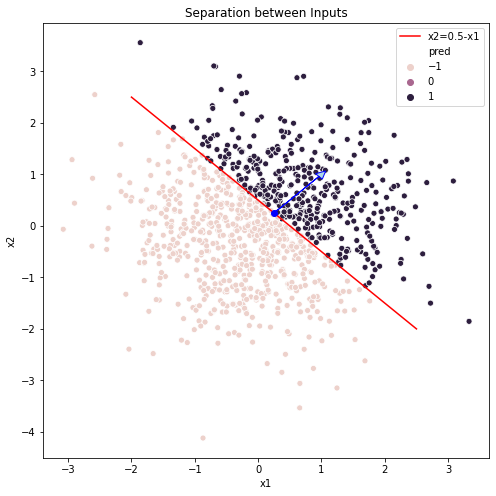

In [11]:
predic=np.array(predic, dtype='int')
data_all = pd.DataFrame({'x1': x[1], 'x2': x[2], 'pred': predic})

bias = weights[0]
weights_plot = np.delete(weights,0)

fig, ax = plt.subplots(1, 1, figsize = (8, 8))
origin= weights_plot.T*(bias/np.linalg.norm(weights_plot)**2)

x_boundary = np.linspace(-2,2.5)
ax.arrow(origin[0], origin[1],weights_plot[0]/np.linalg.norm(weights_plot), weights_plot[1]/np.linalg.norm(weights_plot), head_width=0.15, head_length=0.15, fc='lightblue', ec='blue',label='Weight vector')
sn.scatterplot(data=data_all,x='x1',y='x2',hue='pred');
plt.plot(x_boundary,0.5-x_boundary,'r',label='x2=0.5-x1'); # PLot the dividing line 
ax.plot(origin[0], origin[1], 'bo')
ax.legend()
plt.title('Separation between Inputs');

difference_angles=np.dot(weights_plot/np.linalg.norm(weights_plot),[1,-1]/np.sqrt(2))
print('For the weight vector to be optimal, the dot product between the desired classification line (x2=0.5-x1) \nand the weight vector should be zero. In this case, it is: ' + str(difference_angles) + ', pretty close to 0.')

# Exercise 4

### a) Define the XOR function for the perceptron

In [12]:
def xor_gate(x):
    return 0 if x[1]==x[2]==0 or x[1]==x[2]==1 else 1

### b) Show that the learning algorithm does not converge

In [13]:
def new_weights_xor(weights,learn_step,x):
    return weights+learn_step*(xor_gate(x)-mccull_withbias(x,weights))*x

epoch1=epoch
x_binary= -(np.ones(1000))
x_binary=np.vstack((x_binary,np.random.randint(low=0,high=2,size=[2,1000])))

iter_weights = np.array([0.3,0.3,0.3])
learn_step = 0.2
num_epochs = 1000
weights = np.array([0,0,0])
epoch=0

while np.linalg.norm(weights - iter_weights)> 10**-5 and epoch < num_epochs:
   # if  not np.array_equal(iter_weights,weights):
    weights=iter_weights
    for i in range (0,len(x_binary.T)):
        iter_weights=new_weights_xor(iter_weights,learn_step,x_binary[:,i])
    epoch += 1
    if epoch<=epoch1: # Print only the iterations that were needed for the previous convergence so we do not have a lot.
        print(iter_weights)

if epoch>= num_epochs:
    
    print('... \nThe learning algorithm has not converged after ' + str(epoch) + ' iterations.')

[0.1 0.1 0.1]
[-0.1 -0.1  0.3]
[0.1 0.1 0.1]
[-0.1 -0.1  0.3]
[0.1 0.1 0.1]
[-0.1 -0.1  0.3]
[0.1 0.1 0.1]
[-0.1 -0.1  0.3]
[0.1 0.1 0.1]
[-0.1 -0.1  0.3]
[0.1 0.1 0.1]
[-0.1 -0.1  0.3]
[0.1 0.1 0.1]
[-0.1 -0.1  0.3]
[0.1 0.1 0.1]
[-0.1 -0.1  0.3]
[0.1 0.1 0.1]
[-0.1 -0.1  0.3]
[0.1 0.1 0.1]
... 
The learning algorithm has not converged after 1000 iterations.


It can be easily seen that the algorithm does not converge for a XOR logical gate.

### c) Plot XOR and explain why it is not linearly separable

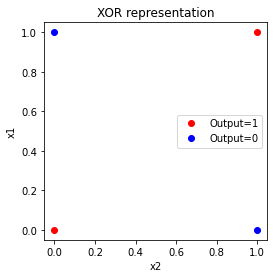

In [14]:
fig, ax = plt.subplots(1, 1, figsize = (4,4))

plt.plot([0,1],[0,1],'ro',label='Output=1')
plt.plot([1,0],[0,1],'bo',label='Output=0');
ax.legend()
plt.title('XOR representation');
plt.ylabel('x1')
plt.xlabel('x2');

The XOR classigication problem cannot be linearly separable because it is not possible to draw a unique decision boundary that divides the output in 2 different haflplanes. 
We need at least 2 different lines to perform that classification.